**Load Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from termcolor import colored
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from imblearn.over_sampling import SMOTE
from pickle import dump
from pickle import load
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

**Load Dataset**

In [2]:
water = pd.read_csv('water_potability.csv')
water.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
water.shape

(3276, 10)

In [4]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
water.fillna(water.mean(), inplace = True)
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**Data Type**

In [7]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Descriptive Statistics**

In [8]:
water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

**EDA**

Pairplot

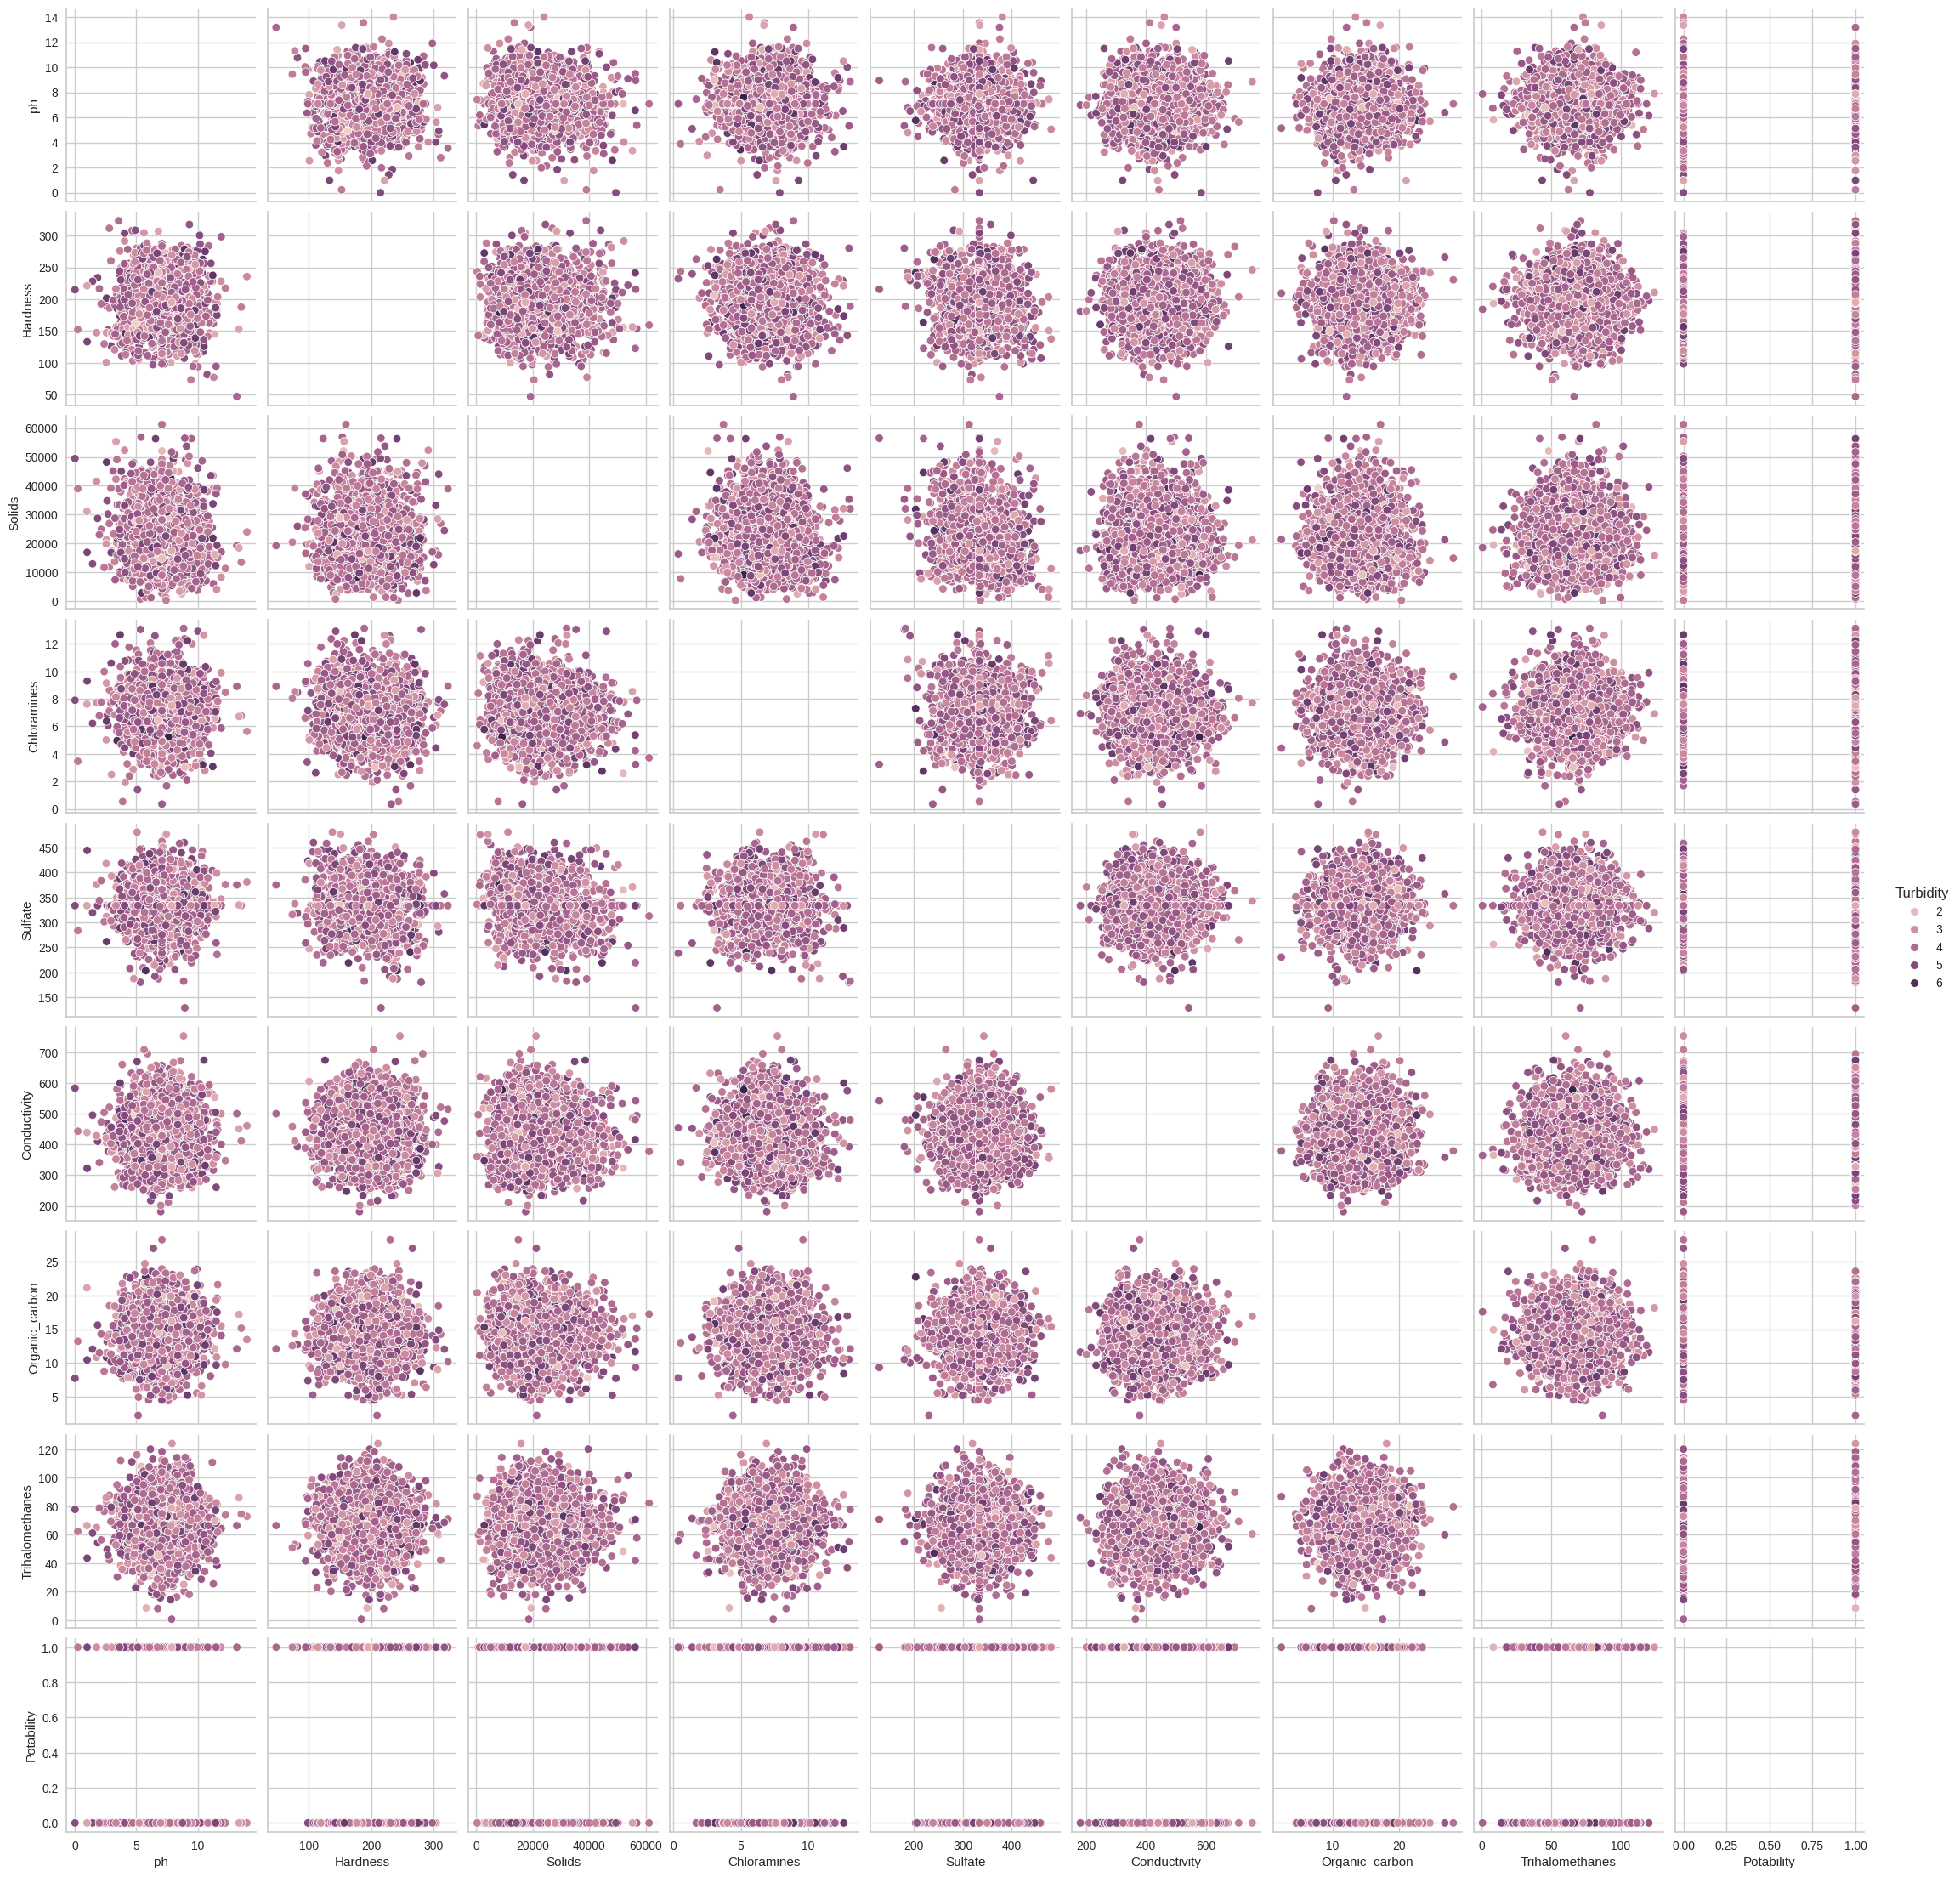

In [9]:
sns.pairplot(water, hue = 'Turbidity')

Correlation Matrix

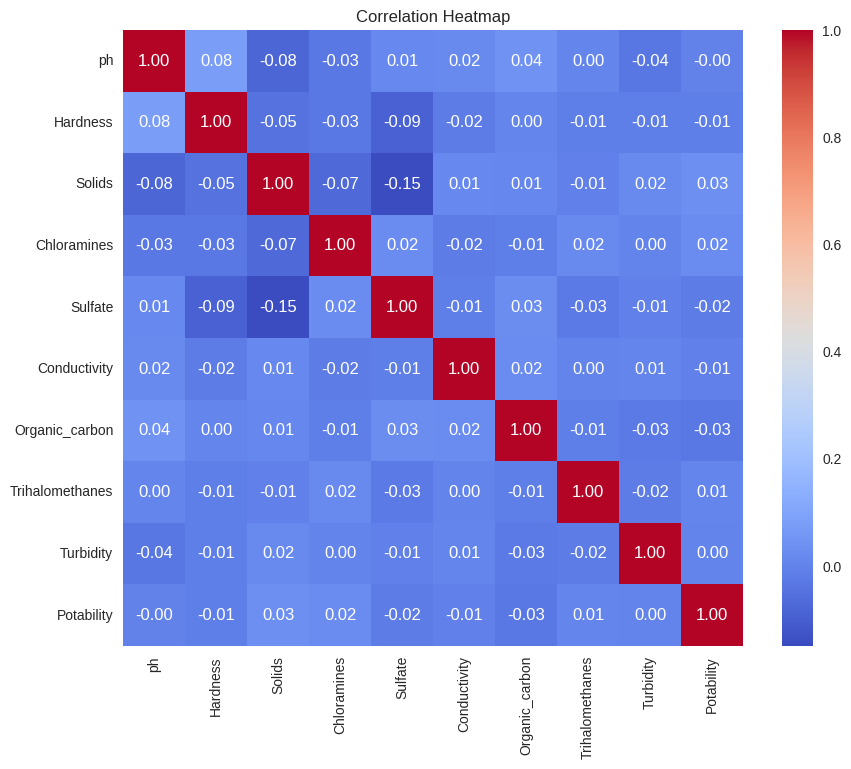

In [10]:
water_ = water.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = water_.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

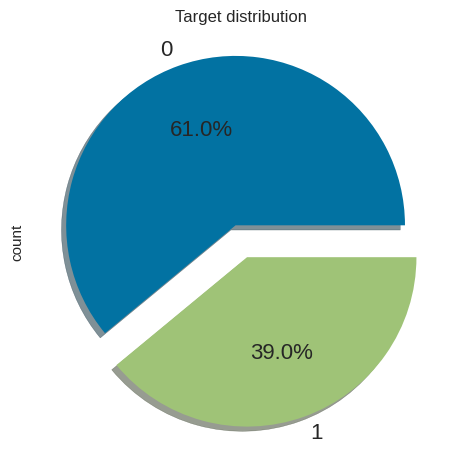

In [11]:
water['Potability'].value_counts().plot.pie(explode=[0.1,0.1],
                    autopct='%1.1f%%', shadow=True,
                    textprops={'fontsize':16}).set_title("Target distribution");


**61.0% is Not Potable and 39.0% is Potable**

In [12]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [13]:
x = water.drop(['Potability'], axis = 1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
y = water['Potability'].values

In [14]:
print('Frequencies of the y before balanced')
y_count = Counter(y)
print(y_count)

# Construct object SMOTE
resampler = SMOTE()

# Perform Balance
data_x_b, data_y_b = resampler.fit_resample(x, y)

# Print the frequencies of the classes after balanced
print('Frequencies of the y after balanced')
y_count = Counter(data_y_b)
print(y_count)

Frequencies of the y before balanced
Counter({0: 1998, 1: 1278})
Frequencies of the y after balanced
Counter({0: 1998, 1: 1998})


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [16]:
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.177
Date:                Wed, 18 Sep 2024   Prob (F-statistic):              0.305
Time:                        16:05:08   Log-Likelihood:                -2291.3
No. Observations:                3276   AIC:                             4603.
Df Residuals:                    3266   BIC:                             4664.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4716      0.146      3.232      0.001       0.185       0.758
x1             0.0009      0.006      0.158      0.874      -0.011       0.012
x2            -0.0002      0.000     -0.753      0.451      -0.001       0.000
x3          1.842e-06   9.91e-07      1.859      0.063   -1.01e-07    3.78e-06
x4             0.0079      0.005      1.457      0.145      -0.003       0.018
x5            -0.0002      0.000     -0.940      0.347      -0.001       0.000
x6         -4.862e-05      0.000     -0.461      0.645      -0.000       0.000
x7            -0.0043      0.003     -1.679      0.093      -0.009       0.001
x8             0.0002      0.001      0.335      0.738      -0.001       0.001
x9          -7.19e-06      0.011     -0.001      0.999      -0.021       0.021
==============================================================================
Omnibus:                    13509.557   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.990
Skew:                           0.450   Prob(JB):                    4.54e-119
Kurtosis:                       1.216   Cond. No.                     4.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.005533228046742167, -0.005255501835937038)

In [19]:
parameters = {
    'n_estimators' : [300],
    'max_depth' : [15],
    'max_features' : ['sqrt'],
    'random_state' : [42],
    'min_samples_leaf' : [1],
    'min_samples_split' : [4]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(x_train, y_train)
print(colored('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_), 'blue'))

rf = RandomForestClassifier(**rf_cv.best_params_).fit(x_train, y_train)

Tuned hyper parameters :
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300, 'random_state': 42}


In [20]:
y_pred_proba = rf.predict_proba(x_test)

# Predict the classes in the test set
y_pred = rf.classes_[y_pred_proba.argmax(axis=1)]
#y_pred = rf.predic}t(atributos_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6734486266531028


confusion matrix

In [21]:
cm = confusion_matrix(y_test, y_pred, labels = rf.classes_)
print(cm)

[[542  46]
 [275 120]]


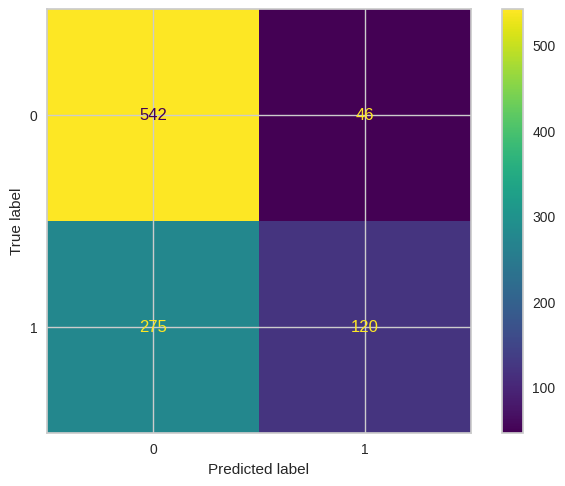

In [22]:
graphic = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
graphic.plot()

In [23]:
x = StandardScaler().fit_transform(x)

In [24]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0    -0.621782  0.000739 -0.037244  1.691281 -1.250906 -0.963530 -1.237341   
1     0.760030  2.415799 -1.873303 -0.091649 -1.092752  0.204868 -0.735130   
2    -0.996212 -0.922699  0.308414  0.734310  0.610027  1.301199 -0.565956   
3    -0.821757 -0.415561  0.476561  1.115365 -0.151216  0.646455  2.418790   
4    -0.204124 -0.602413 -0.079003 -1.837142  0.061039 -0.411276 -1.026472   
...        ...       ...       ...       ...       ...       ...       ...   
3271  2.244357  1.458459 -1.103933  0.092560 -0.275980  0.239601 -0.237608   
3272 -1.121847 -0.737762 -0.620231  0.988101  1.363114  0.977660 -0.082417   
3273  0.278214 -0.380532 -0.051998  0.759930 -0.035142 -0.799159 -0.649531   
3274  0.033242  0.286628  1.446906 -0.514954 -0.723463 -0.618944  0.523082   
3275 -1.079402 -0.780194  0.446836  1.560265  1.703580 -0.224306 -0.166566   

           PC8       PC9  
0    -0.645448 -1.004651  
1    -1.193616  1.304745  
2     0.208397 -0.426664  
3     0.083138 -0.828149  
4     1.586924  0.952088  
...        ...       ...  
3271 -0.609805 -2.165926  
3272  0.120849  0.439895  
3273  1.927683 -0.854038  
3274 -1.747659  0.349056  
3275  0.255472  0.325449  

[3276 rows x 9 columns]

Hierarchical Clustering

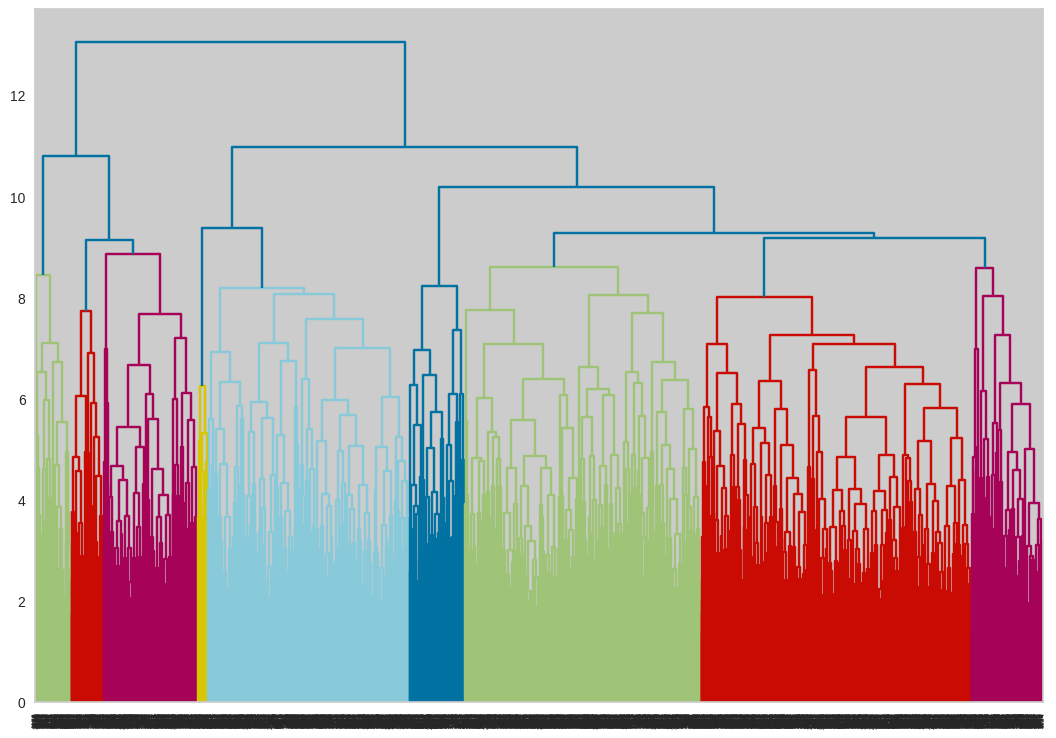

In [25]:
linked = linkage(data, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

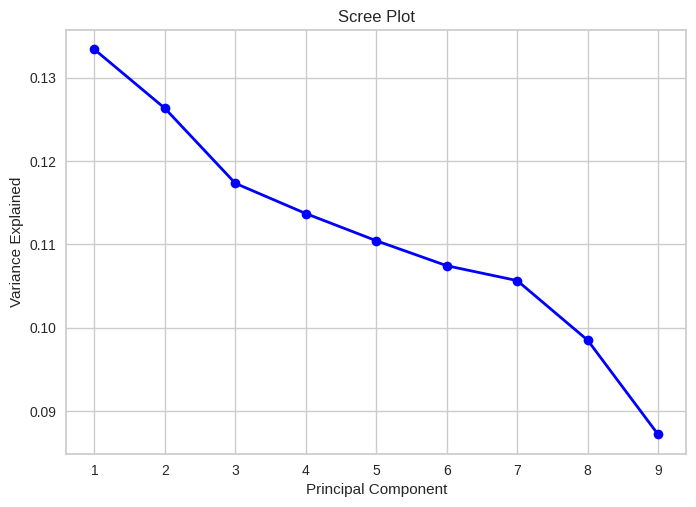

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

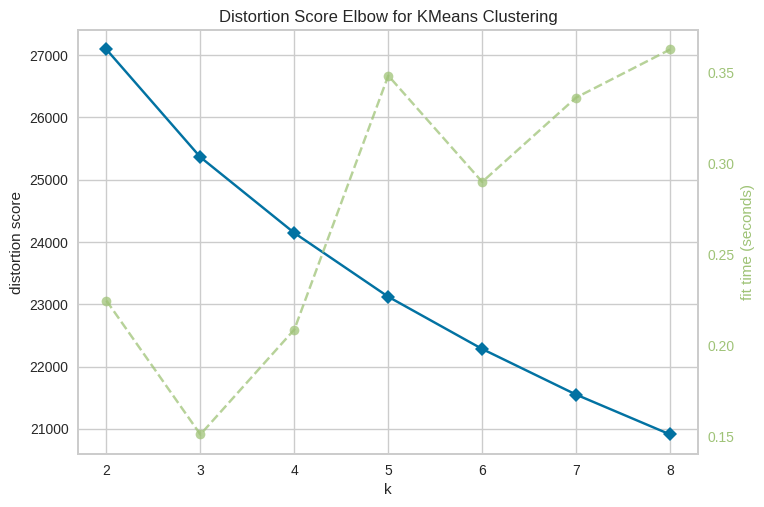

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


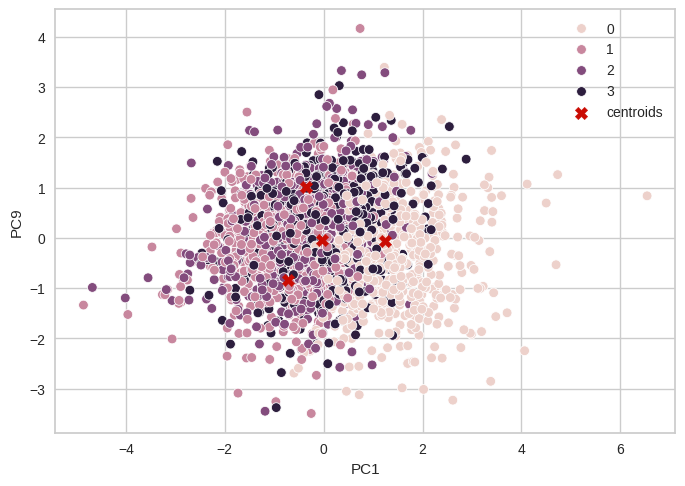

In [28]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
sns.scatterplot(data=data, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()